#Mindy & Meghana - CNN implementation of music mood classification

Reference: https://github.com/yfliao/Emotion-Classification-Ravdess/blob/master/EmotionsRecognition.ipynb

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd '/content/drive/MyDrive/Junior Year 2022-2023/Adv Topics in DS/Final Project/Audio_Song_Actors_01-24.zip (Unzipped Files)'

/content/drive/.shortcut-targets-by-id/1NapHAfjg4RD9wDU3PWTQufSYyPFJo2cz/Final Project/Audio_Song_Actors_01-24.zip (Unzipped Files)


In [ ]:
!pip install librosa

In [4]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('03-02-01-01-01-01-01.wav')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


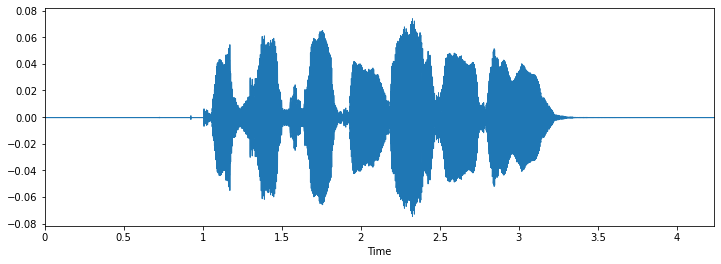

In [5]:
%pylab inline
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
def env_mask(wav,threshold):
  wav = np.abs(wav)
  mask = wav > threshold
  return wav[mask]

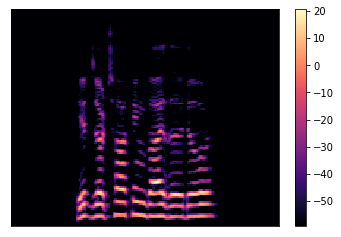

In [ ]:
sample = env_mask(data,0.005)
spec = librosa.feature.melspectrogram(data)
s = librosa.amplitude_to_db(spec)


i = librosa.display.specshow(s)
plt.colorbar(i)

# LOAD FILES



In [ ]:

path = '/content/drive/MyDrive/Junior Year 2022-2023/Adv Topics in DS/Final Project/Audio_Song_Actors_01-24.zip (Unzipped Files)'
lst = []

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        file = file[6:8]
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue     

In [ ]:
# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)

In [ ]:
X = np.asarray(X)
y = np.asarray(y)
y = y.astype(float)


X.shape, y.shape

((1012, 40), (1012,))

In [ ]:
X[0]

array([-5.47604431e+02,  4.98303795e+01, -2.24683971e+01,  1.56092253e+01,
       -9.78451633e+00,  4.83672678e-01, -1.98873615e+01, -5.14721918e+00,
       -2.03802319e+01, -5.88283396e+00, -1.48539209e+00, -7.02337742e+00,
       -4.86748886e+00, -4.71298265e+00, -9.73164749e+00,  3.24860764e+00,
       -1.36314745e+01, -6.44444180e+00, -3.68649507e+00, -6.81283140e+00,
       -1.03157444e+01, -1.47378373e+00, -6.61926603e+00, -7.87375832e+00,
       -3.13309717e+00, -5.26480532e+00, -7.89264584e+00, -2.96802545e+00,
       -4.21916437e+00, -1.97081649e+00,  1.41961849e+00, -7.29857564e-01,
        3.59146863e-01, -2.96817589e+00, -4.08107424e+00, -1.77744651e+00,
        2.23784661e+00,  5.50369740e+00,  8.61369610e+00,  9.70955276e+00],
      dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(809, 40) (809,) (203, 40) (203,)


# NEURAL NETWORK

In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
x_traincnn.shape, x_testcnn.shape

((809, 40, 1), (203, 40, 1))

In [8]:
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix


In [ ]:
model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(learning_rate=0.00005, rho=0.9, epsilon=None, decay=0.0) #I INCREASED THE LEARNING RATE!

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 40, 128)           768       
                                                                 
 activation_9 (Activation)   (None, 40, 128)           0         
                                                                 
 dropout_6 (Dropout)         (None, 40, 128)           0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 5, 128)           0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 5, 128)            82048     
                                                                 
 activation_10 (Activation)  (None, 5, 128)            0         
                                                      

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=opt,
              metrics=['accuracy'])
     

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=500, validation_data=(x_testcnn, y_test))


Epoch 1/500
51/51 [==============================] - 1s 8ms/step - loss: 8.4014 - accuracy: 0.1817 - val_loss: 2.8234 - val_accuracy: 0.1626
Epoch 2/500
51/51 [==============================] - 0s 5ms/step - loss: 5.8840 - accuracy: 0.1928 - val_loss: 1.9730 - val_accuracy: 0.2463
Epoch 3/500
51/51 [==============================] - 0s 5ms/step - loss: 5.6165 - accuracy: 0.1755 - val_loss: 2.4667 - val_accuracy: 0.2217
Epoch 4/500
51/51 [==============================] - 0s 5ms/step - loss: 5.1583 - accuracy: 0.1953 - val_loss: 1.8885 - val_accuracy: 0.2167
Epoch 5/500
51/51 [==============================] - 0s 5ms/step - loss: 5.0619 - accuracy: 0.1496 - val_loss: 1.6232 - val_accuracy: 0.3202
Epoch 6/500
51/51 [==============================] - 0s 5ms/step - loss: 4.5936 - accuracy: 0.1879 - val_loss: 1.6236 - val_accuracy: 0.3547
Epoch 7/500
51/51 [==============================] - 0s 5ms/step - loss: 4.4571 - accuracy: 0.2064 - val_loss: 1.9189 - val_accuracy: 0.3350
Epoch 8/500
5

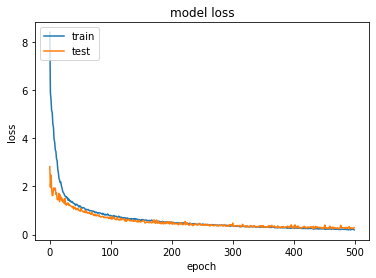

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

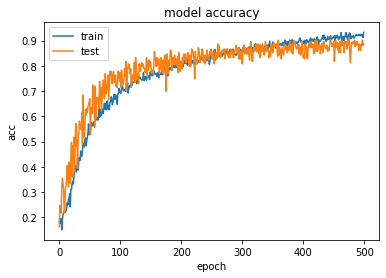

In [ ]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#SAVE, LOAD, & TEST

In [ ]:
model_name = 'Emotion_Voice_Detection_Model_RAVDESS_12-17.h5'
save_dir = '/content/drive/MyDrive/Junior Year 2022-2023/Adv Topics in DS/Final Project'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

In [9]:
loaded_model = keras.models.load_model('/content/drive/MyDrive/Junior Year 2022-2023/Adv Topics in DS/Final Project/Emotion_Voice_Detection_Model_RAVDESS_12-17.h5')
loaded_model.summary()
     

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 40, 128)           768       
                                                                 
 activation_9 (Activation)   (None, 40, 128)           0         
                                                                 
 dropout_6 (Dropout)         (None, 40, 128)           0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 5, 128)           0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 5, 128)            82048     
                                                                 
 activation_10 (Activation)  (None, 5, 128)            0         
                                                      

In [ ]:
loss, acc = loaded_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

# GENERALIZABILITY?

In [11]:
happy_raw_audio, sr = librosa.load('/content/drive/MyDrive/Junior Year 2022-2023/Adv Topics in DS/Final Project/Test audio/Happy (Happy).wav')
sad_raw_audio, sad_sr = librosa.load('/content/drive/MyDrive/Junior Year 2022-2023/Adv Topics in DS/Final Project/Test audio/Special (Sad).wav')
angry_raw_audio, angry_sr = librosa.load('/content/drive/MyDrive/Junior Year 2022-2023/Adv Topics in DS/Final Project/Test audio/Enemy (Angry).wav')
neutral_raw_audio, neutral_sr = librosa.load('/content/drive/MyDrive/Junior Year 2022-2023/Adv Topics in DS/Final Project/Test audio/Better Days (Neutral).wav')
lofi_raw_audio, lofi_sr = librosa.load('/content/drive/MyDrive/Junior Year 2022-2023/Adv Topics in DS/Final Project/Test audio/Lofi.wav')

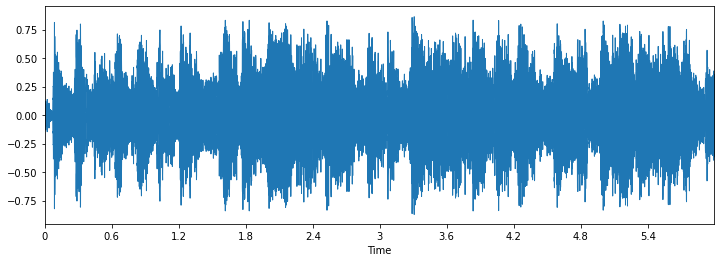

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(happy_raw_audio, sr=sr)

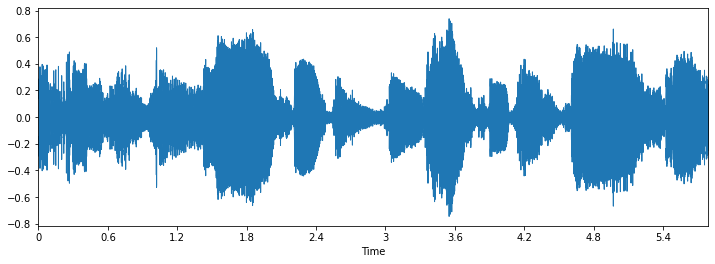

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(sad_raw_audio, sr=sad_sr)

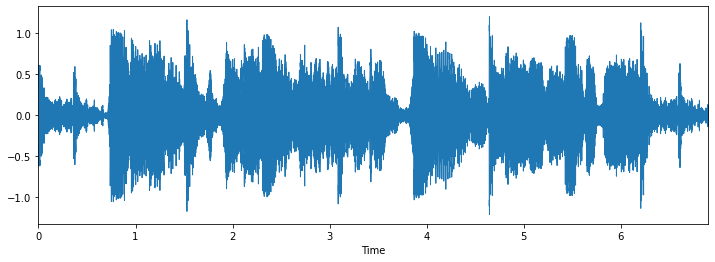

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(angry_raw_audio, sr=angry_sr)

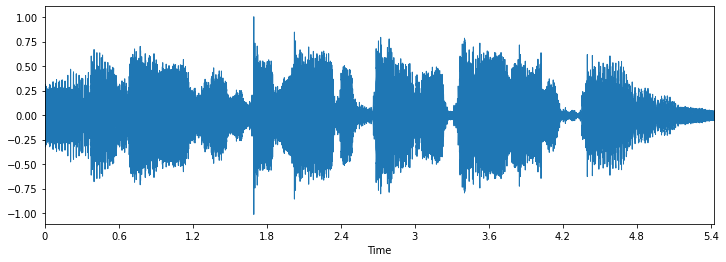

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(neutral_raw_audio, sr=neutral_sr)

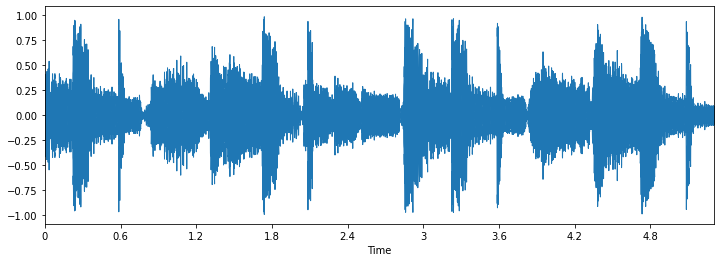

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(lofi_raw_audio, sr=lofi_sr)

In [12]:
happy_mfcc = np.mean(librosa.feature.mfcc(y=happy_raw_audio, sr = sr,n_mfcc=40).T,axis=0)
sad_mfcc = np.mean(librosa.feature.mfcc(y=sad_raw_audio, sr = sad_sr,n_mfcc=40).T,axis=0)
angry_mfcc = np.mean(librosa.feature.mfcc(y=angry_raw_audio, sr=angry_sr,n_mfcc=40).T,axis=0)
neutral_mfcc = np.mean(librosa.feature.mfcc(y=neutral_raw_audio, sr=neutral_sr,n_mfcc=40).T,axis=0)
lofi_mfcc = np.mean(librosa.feature.mfcc(y=lofi_raw_audio, sr=lofi_sr,n_mfcc=40).T,axis=0)

In [13]:
matrix = [happy_mfcc, sad_mfcc, angry_mfcc, neutral_mfcc, lofi_mfcc]
matrix = np.array(matrix)

In [14]:
X_happy = np.asarray(happy_mfcc)
X_happy = np.expand_dims(matrix[0], axis=0)
X_happy = np.expand_dims(X_happy, axis=2)

X_sad = np.asarray(sad_mfcc)
X_sad = np.expand_dims(matrix[1], axis=0)
X_sad = np.expand_dims(X_sad, axis=2)

X_angry = np.asarray(angry_mfcc)
X_angry = np.expand_dims(matrix[2], axis=0)
X_angry = np.expand_dims(X_angry, axis=2)

X_neutral = np.asarray(neutral_mfcc)
X_neutral = np.expand_dims(matrix[3], axis=0)
X_neutral = np.expand_dims(X_neutral, axis=2)

X_lofi = np.asarray(lofi_mfcc)
X_lofi = np.expand_dims(matrix[4], axis=0)
X_lofi = np.expand_dims(X_lofi, axis=2)

In [16]:
pred_happy = np.argmax(loaded_model.predict(X_happy))
pred_sad = np.argmax(loaded_model.predict(X_sad))
pred_angry = np.argmax(loaded_model.predict(X_angry))
pred_neutral = np.argmax(loaded_model.predict(X_neutral))
pred_lofi = np.argmax(loaded_model.predict(X_lofi))

1/1 [==============================] - 0s 61ms/step


In [18]:
print(pred_happy, pred_sad, pred_angry, pred_neutral, pred_lofi)

2 5 5 3 2
